# Deterministic Finite Automaton Minimization

In [59]:
from graphviz import Digraph


class Automaton:
    def __init__(self, states=None, final_states=None, by_zero=None, by_one=None):
        self.states = states
        self.final_states = final_states
        self.by_zero = by_zero
        self.by_one = by_one

    def visualize(self):
        graph = Digraph()

        for state in self.states:
            if state in self.final_states:
                graph.node(name=str(state), label=str(state), shape='doublecircle')
            else:
                graph.node(name=str(state), label=str(state), shape='circle')

        for tail, head in enumerate(self.by_zero):
            graph.edge(tail_name=str(tail), head_name=str(head), label='0')

        for tail, head in enumerate(self.by_one):
            graph.edge(tail_name=str(tail), head_name=str(head), label='1')

        return graph


def read_automaton(input_file):
    automaton = Automaton()

    with open(input_file) as file:
        automaton.states = list(range(int(file.readline())))
        lines = []
        for line in file.readlines():
            lines.append([int(i) for i in line.split()])
        automaton.final_states, automaton.by_zero, automaton.by_one = lines

    return automaton


def get_equivalence_classes(automaton):
    equivalence_classes = []

    marked_states = []
    for state in automaton.states:
        if state in automaton.final_states:
            marked_states.append((1, (None, None)))  # (<class>, (<transition_by_zero_class>, <transition_by_one_class>))
        else:
            marked_states.append((0, (None, None)))

    old_classes_count = len(set(marked_states))

    while True:
        for state, state_marks in enumerate(marked_states):
            marked_states[state] = \
                (state_marks[0],
                 (marked_states[automaton.by_zero[state]][0], marked_states[automaton.by_one[state]][0]))

        unique_marks = list(set(marked_states))
        for state, state_marks in enumerate(marked_states):
            marked_states[state] = (unique_marks.index(state_marks), (None, None))

        if len(unique_marks) == old_classes_count:
            for equivalence_class in range(len(unique_marks)):
                equivalence_classes.append([state for state, state_marks in enumerate(marked_states)
                                           if state_marks[0] == equivalence_class])
            break

        old_classes_count = len(unique_marks)

    return equivalence_classes


def minimize_automaton(automaton, equivalence_classes):
    for equivalence_class in equivalence_classes:
        if len(equivalence_class) > 1:
            print(equivalence_class)
    return automaton


initial_automaton = read_automaton('input.txt')
equivalence_classes = get_equivalence_classes(initial_automaton)
minimal_automaton = minimize_automaton(initial_automaton, equivalence_classes)

[0, 4]


### Initial automaton

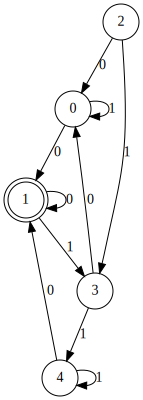

In [56]:
initial_automaton.visualize()

### Minimal automaton

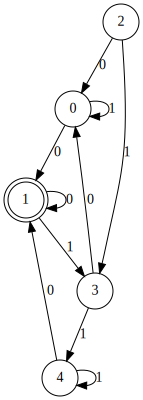

In [57]:
minimal_automaton.visualize()
